In this project a dataset of a spanish building has been analysed to predict the inner temperature of it, using correlation and machine learning starting by the data regarding humidity and lighting. 



First step, we import the dataset adjusting it to our need, and we choose a set of dates we will work on (from 11/03/2012 to 23/03/2012 of a General Room):

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


DataFolderPath = "C:\Users\SilviaAnna\Desktop\Temperature Prediction of a Spanish Building Cordieri-Persico\spanish datadriven building\DataSet"
FileName= "NEW-DATA-1.T15.txt"
FilePath = DataFolderPath+"/"+FileName


DataFrame = pd.read_csv(FilePath, sep= " ", index_col=11)
DataFrame["period"] = DataFrame["1:Date"].map(str) + " " + DataFrame["2:Time"].map(str)
DataFrame.index = DataFrame["period"]


previousIndex= DataFrame.index 
ParsedIndex= pd.to_datetime(previousIndex)
DataFrame.index= ParsedIndex
DF_myChosenDates = DataFrame["2012-03-11 12:00:00 ":"2012-03-23 12:00:00 "]
DF_cleaned = DF_myChosenDates.dropna()
DF_cleaned.describe()



,3:Temperature_Comedor_Sensor,4:Temperature_Habitacion_Sensor,5:Weather_Temperature,6:CO2_Comedor_Sensor,7:CO2_Habitacion_Sensor,8:Humedad_Comedor_Sensor,9:Humedad_Habitacion_Sensor,10:Lighting_Comedor_Sensor,11:Lighting_Habitacion_Sensor,13:Meteo_Exterior_Crepusculo,...,15:Meteo_Exterior_Sol_Oest,16:Meteo_Exterior_Sol_Est,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro,19:Exterior_Entalpic_1,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor,24:Day_Of_Week
count,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,...,962.000000,962.000000,962.000000,962.000000,962.0,962.0,962.0,962.000000,962.000000,962.000000
mean,17.886457,17.644317,12.732017,210.757965,214.851367,42.872215,45.672917,28.125255,40.445302,317.747632,...,15812.698717,11789.000283,25007.354775,208.003814,0.0,0.0,0.0,15.139184,57.295652,3.846362
std,3.213641,3.238047,3.800803,21.723155,29.503657,6.217540,7.698764,25.713118,42.960541,305.387582,...,27980.711135,21770.483068,36372.230949,294.569568,0.0,0.0,0.0,3.807341,13.600247,1.768699
min,11.352000,11.076000,0.000000,197.664000,199.179000,27.084000,29.594700,11.165300,11.507300,0.650000,...,0.000000,0.000000,0.000000,-4.034670,0.0,0.0,0.0,9.223330,22.728000,1.000000
25%,15.521700,15.214325,9.000000,202.605250,204.971000,39.160700,41.463350,11.605300,13.362700,0.650000,...,0.000000,0.000000,0.000000,-3.250670,0.0,0.0,0.0,11.785150,48.943350,2.066670
50%,18.161650,17.947650,15.000000,207.397500,209.130500,43.113350,45.558650,11.784700,14.548650,564.618500,...,0.000000,0.000000,0.000000,-1.209335,0.0,0.0,0.0,14.649000,60.220000,4.000000
75%,20.420475,19.976350,15.000000,212.242500,214.285000,47.148700,50.222650,31.560300,47.683000,619.157000,...,14467.000000,9666.047500,52854.625000,443.771000,0.0,0.0,0.0,17.712650,65.706700,5.000000
max,24.192000,24.380000,20.000000,445.803000,475.051000,60.957300,62.594700,110.693000,162.965000,624.960000,...,94978.000000,83877.900000,95660.700000,923.307000,0.0,0.0,0.0,25.713300,83.805300,7.000000


We now select the colums from the data we will try to correlate and plot them in odfer to see whether they have similar plots:

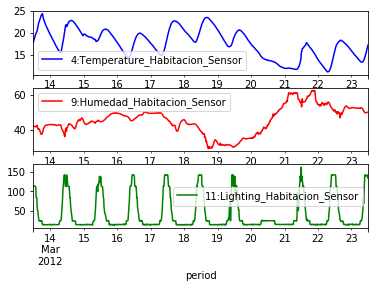

In [38]:
DF_cleaned.corr()
fig = plt.figure()
ax1= fig.add_subplot(3,1,1) 
ax2= fig.add_subplot(3,1,2)
ax3= fig.add_subplot(3,1,3)

DF_cleaned["4:Temperature_Habitacion_Sensor"].plot(ax=ax1,color= "b", legend= True)
DF_cleaned["9:Humedad_Habitacion_Sensor"].plot(ax=ax2,color= "r", legend= True)
DF_cleaned["11:Lighting_Habitacion_Sensor"].plot(ax=ax3,color= "g", legend= True)
plt.show()


We can see that as predicted there's a correlation between the variation of this three quantities. Therefore we can proceed to find a prevision of the Temperature considering Humidity and Lighting. 

In [39]:
DF_FinalDataSet= DF_cleaned.copy()
def lag_column(df,column_name,lag_period=1):
    for i in range(1,lag_period+1,1):
        new_column_name= column_name+"-"+str(i)+"hr"
        df[new_column_name]= df[column_name].shift(i)
  
    return df

DF_FinalDataSet= lag_column(DF_FinalDataSet,"4:Temperature_Habitacion_Sensor",24)

DF_FinalDataSet.dropna(inplace=True)

DF_FinalDataSet.index      
DF_FinalDataSet.index.hour
DF_FinalDataSet.index.month 
DF_FinalDataSet.index.week   

DF_FinalDataSet["hour"]= DF_FinalDataSet.index.hour              
DF_FinalDataSet["month"]= DF_FinalDataSet.index.month
DF_FinalDataSet["week_of_year"]= DF_FinalDataSet.index.week   

def weekendDetector(day):
    weekendLabel=0
    if (day== 5or day==6):
        weekendLabel=1
    else:
        weekendLabel=0
    return weekendLabel  
    
def dayDetector(hour):
    dayLabel=1
    if(hour<20 and hour>9):
        dayLabel=1 
    else:
        dayLabel=0
    return dayLabel      

simpleVectorOfDays = [0,1,2,3,4,5,6]
weekendorNotVector = [ weekendDetector(thisDay) for thisDay in simpleVectorOfDays] 

hoursOfDayVector= range(0,24,1)
dayOrNotVector= [dayDetector(thisHour) for thisHour in hoursOfDayVector] 
DF_FinalDataSet["weekend"]= [weekendDetector(thisDay) for thisDay in DF_FinalDataSet.index.dayofweek]   
DF_FinalDataSet["day_night"]= [dayDetector(thisHour) for thisHour in DF_FinalDataSet.index.hour]  
DF_FinalDataSet.drop(DF_FinalDataSet.columns[[0,1,2,5,6,7,9,11,12,13,14,15,17,18,19,23]],axis=1,inplace=True);

DF_FinalDataSet.dropna(inplace=True)    

DF_FinalDataSet.head()

,3:Temperature_Comedor_Sensor,4:Temperature_Habitacion_Sensor,5:Weather_Temperature,6:CO2_Comedor_Sensor,8:Humedad_Comedor_Sensor,18:Meteo_Exterior_Piranometro,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor,24:Day_Of_Week,4:Temperature_Habitacion_Sensor-1hr,...,4:Temperature_Habitacion_Sensor-20hr,4:Temperature_Habitacion_Sensor-21hr,4:Temperature_Habitacion_Sensor-22hr,4:Temperature_Habitacion_Sensor-23hr,4:Temperature_Habitacion_Sensor-24hr,hour,month,week_of_year,weekend,day_night
period,,,,,,,,,,,,,,,,,,,,,
2012-03-13 17:45:00,21.7133,24.1413,18.0000,211.051,41.4107,15.57000,19.7560,47.0693,2.0,24.0213,...,19.0414,18.7513,18.4367,18.1207,17.8275,17,3,11,0,1
2012-03-13 18:00:00,21.6600,24.2680,18.0000,210.763,41.9920,5.00933,19.5273,49.5467,2.0,24.1413,...,19.2773,19.0414,18.7513,18.4367,18.1207,18,3,11,0,1
2012-03-13 18:15:00,21.5960,24.3800,18.0000,210.571,43.1973,-2.93933,19.3013,52.2027,2.0,24.2680,...,19.5367,19.2773,19.0414,18.7513,18.4367,18,3,11,0,1
2012-03-13 18:30:00,21.5307,24.0707,17.8667,209.920,43.8213,-3.90400,19.0413,53.8053,2.0,24.3800,...,19.7307,19.5367,19.2773,19.0414,18.7513,18,3,11,0,1
2012-03-13 18:45:00,21.4493,23.5880,17.0000,209.792,44.3893,-3.70800,18.7680,54.9280,2.0,24.0707,...,19.9693,19.7307,19.5367,19.2773,19.0414,18,3,11,0,1


So having our dataframe now ,we can create a training dataset for machine learning:

In [40]:
DF_FinalDataSet.corr()

DF_target = DF_FinalDataSet["4:Temperature_Habitacion_Sensor"]
DF_features = DF_FinalDataSet.drop("4:Temperature_Habitacion_Sensor", axis = 1) 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(DF_features,DF_target,test_size=0.2,random_state=41234)


First we compute the Linear Regression method. We plot a comparison between the predicted and the actual value , but also a scattering plot:

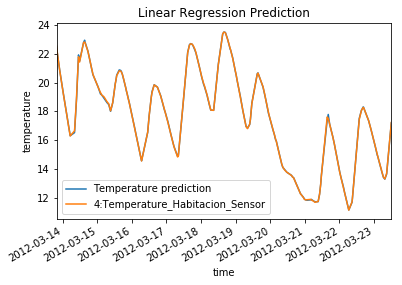

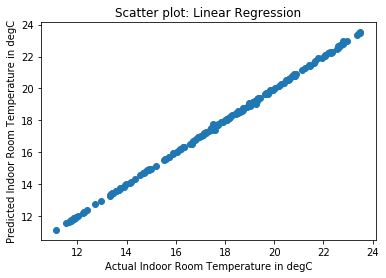

Linear regression: mean absolute error 0.0301221178792
mean squared error 0.0022114631611
R2 0.999787745592


In [41]:
from sklearn import linear_model
linear_reg = linear_model.LinearRegression()

linear_reg.fit(X_train,Y_train)
predict_linearReg_split = linear_reg.predict(X_test) 

Y_test.index
predict_DF_linearReg_split = pd.DataFrame(predict_linearReg_split,index = Y_test.index,columns = ["Temperature prediction"])
predict_DF_linearReg_split = predict_DF_linearReg_split.join(Y_test)
predict_DF_linearReg_split_ChosenDates = predict_DF_linearReg_split["2012-03-11":"2012-03-23"]
predict_DF_linearReg_split_ChosenDates.plot()
plt.xlabel("time")
plt.ylabel("temperature")
plt.title("Linear Regression Prediction")

plt.figure()
plt.scatter(predict_DF_linearReg_split_ChosenDates["4:Temperature_Habitacion_Sensor"],predict_DF_linearReg_split_ChosenDates["Temperature prediction"])
plt.xlabel("Actual Indoor Room Temperature in degC")
plt.ylabel("Predicted Indoor Room Temperature in degC")
plt.title("Scatter plot: Linear Regression")
plt.show() 

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mean_absolute_error_linearReg_split = mean_absolute_error(Y_test,predict_linearReg_split)
mean_squared_error_linearReg_split = mean_squared_error(Y_test,predict_linearReg_split)
R2_score_linearReg_split = r2_score(Y_test,predict_linearReg_split)

print "Linear regression: mean absolute error "+str(mean_absolute_error_linearReg_split)
print "mean squared error "+str(mean_squared_error_linearReg_split)
print "R2 "+str(R2_score_linearReg_split)

Next we compute the Cross Validation prediction:

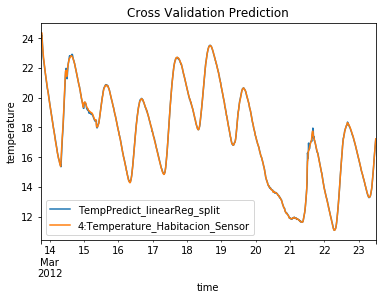

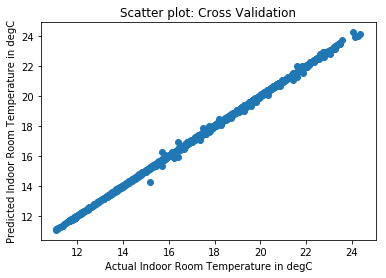

Cross Validation: mean absolute error 0.0382324409286
mean squared error 0.0052981965918
R20.999488090214


In [42]:
from sklearn.model_selection import cross_val_predict

"""
we have already imported the linear_reg algorithm, no deed to do it again
from sklearn import linear_model, linear_reg = linear_model.LinearRegression
"""

predict_linearReg_CV = cross_val_predict(linear_reg,DF_features,DF_target,cv=10)
predict_DF_linearReg_CV = pd.DataFrame(predict_linearReg_CV,index = DF_target.index,columns = ["TempPredict_linearReg_split"])
predict_DF_linearReg_CV = predict_DF_linearReg_CV.join(DF_target)
predict_DF_linearReg_CV_ChosenDates = predict_DF_linearReg_CV["2012-03-11 12:00:00 ":"2012-03-23 12:00:00"]
predict_DF_linearReg_CV_ChosenDates.plot()
plt.xlabel("time")
plt.ylabel("temperature")
plt.title("Cross Validation Prediction") 

plt.figure()
plt.scatter(predict_DF_linearReg_CV_ChosenDates["4:Temperature_Habitacion_Sensor"],predict_DF_linearReg_CV_ChosenDates["TempPredict_linearReg_split"])
plt.xlabel("Actual Indoor Room Temperature in degC")
plt.ylabel("Predicted Indoor Room Temperature in degC")
plt.title("Scatter plot: Cross Validation")
plt.show()    

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mean_absolute_error_linearReg_CV = mean_absolute_error(DF_target,predict_linearReg_CV)
mean_squared_error_linearReg_CV = mean_squared_error(DF_target,predict_linearReg_CV)
R2_score_linearReg_CV = r2_score(DF_target,predict_linearReg_CV)
print "Cross Validation: mean absolute error "+str(mean_absolute_error_linearReg_CV)
print "mean squared error "+str(mean_squared_error_linearReg_CV)
print "R2"+str(R2_score_linearReg_CV)


And as last we perform the Random Forest Regression computation

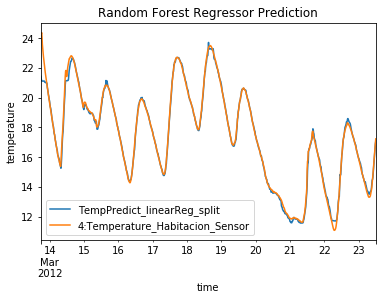

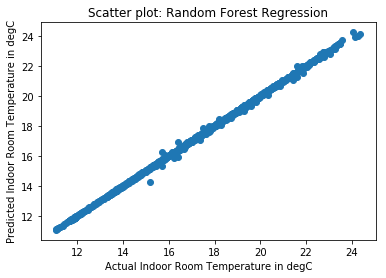

In [43]:

from sklearn.ensemble import RandomForestRegressor
reg_RF = RandomForestRegressor()
predict_RF_CV = cross_val_predict(reg_RF,DF_features,DF_target,cv=10)
predict_DF_RF_CV = pd.DataFrame(predict_RF_CV,index = DF_target.index,columns = ["TempPredict_linearReg_split"])
predict_DF_RF_CV = predict_DF_RF_CV.join(DF_target)
predict_DF_RF_CV_ChosenDates = predict_DF_RF_CV["2012-03-11":"2012-03-23"]
predict_DF_RF_CV_ChosenDates.plot()
plt.xlabel("time")
plt.ylabel("temperature")
plt.title("Random Forest Regressor Prediction")


plt.figure()
plt.scatter(predict_DF_linearReg_CV_ChosenDates["4:Temperature_Habitacion_Sensor"],predict_DF_linearReg_CV_ChosenDates["TempPredict_linearReg_split"])
plt.xlabel("Actual Indoor Room Temperature in degC")
plt.ylabel("Predicted Indoor Room Temperature in degC")
plt.title("Scatter plot: Random Forest Regression")
plt.show()

Moreover we'd like to test this procedure considering another enviroment inside the building, the Dining Room. We do so with the same computational tecniques seen in the first case:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


DataFolderPath = "C:\Users\SilviaAnna\Desktop\Temperature Prediction of a Spanish Building Cordieri-Persico\spanish datadriven building\DataSet"
FileName= "NEW-DATA-1.T15.txt"
FilePath = DataFolderPath+"/"+FileName


DataFrame = pd.read_csv(FilePath, sep= " ", index_col=11)
DataFrame["period"] = DataFrame["1:Date"].map(str) + " " + DataFrame["2:Time"].map(str)
DataFrame.index = DataFrame["period"]


previousIndex= DataFrame.index 
ParsedIndex= pd.to_datetime(previousIndex)
DataFrame.index= ParsedIndex
DF_myChosenDates = DataFrame["2012-03-11 12:00:00 ":"2012-03-23 12:00:00 "]
DF_cleaned = DF_myChosenDates.dropna()
DF_cleaned.corr()

fig = plt.figure()
ax1= fig.add_subplot(3,1,1) 
ax2= fig.add_subplot(3,1,2)
ax3= fig.add_subplot(3,1,3)

DF_cleaned["3:Temperature_Comedor_Sensor"].plot(ax=ax1,color= "b", legend= True)
DF_cleaned["8:Humedad_Comedor_Sensor"].plot(ax=ax2,color= "r", legend= True)
DF_cleaned["10:Lighting_Comedor_Sensor"].plot(ax=ax3,color= "g", legend= True)

DF_FinalDataSet= DF_cleaned.copy()
def lag_column(df,column_name,lag_period=1):
    for i in range(1,lag_period+1,1):
        new_column_name= column_name+"-"+str(i)+"hr"
        df[new_column_name]= df[column_name].shift(i)
  
    return df

DF_FinalDataSet= lag_column(DF_FinalDataSet,"3:Temperature_Comedor_Sensor",24)

DF_FinalDataSet.dropna(inplace=True)

DF_FinalDataSet.index     
DF_FinalDataSet.index.hour

DF_FinalDataSet.index.month 
DF_FinalDataSet.index.week   

DF_FinalDataSet["hour"]= DF_FinalDataSet.index.hour              

DF_FinalDataSet["month"]= DF_FinalDataSet.index.month
DF_FinalDataSet["week_of_year"]= DF_FinalDataSet.index.week   

def weekendDetector(day):
    weekendLabel=0
    if (day== 5or day==6):
        weekendLabel=1
    else:
        weekendLabel=0
    return weekendLabel 
    
def dayDetector(hour):
    dayLabel=1
    if(hour<20 and hour>9):
        dayLabel=1 
    else:
        dayLabel=0
    return dayLabel      

simpleVectorOfDays = [0,1,2,3,4,5,6]
weekendorNotVector = [ weekendDetector(thisDay) for thisDay in simpleVectorOfDays] 
hoursOfDayVector= range(0,24,1)
dayOrNotVector= [dayDetector(thisHour) for thisHour in hoursOfDayVector]
    
DF_FinalDataSet["weekend"]= [weekendDetector(thisDay) for thisDay in DF_FinalDataSet.index.dayofweek]   
DF_FinalDataSet["day_night"]= [dayDetector(thisHour) for thisHour in DF_FinalDataSet.index.hour] 
DF_FinalDataSet.drop(DF_FinalDataSet.columns[[0,1,2,4,5,6,7,9,11,12,13,14,15,17,18,19,23]],axis=1,inplace=True);
DF_FinalDataSet.dropna(inplace=True)    

DF_FinalDataSet.corr()

DF_target = DF_FinalDataSet["3:Temperature_Comedor_Sensor"]
DF_features = DF_FinalDataSet.drop("3:Temperature_Comedor_Sensor", axis = 1) 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(DF_features,DF_target,test_size=0.2,random_state=41234)



from sklearn import linear_model
linear_reg = linear_model.LinearRegression()



linear_reg.fit(X_train,Y_train)
predict_linearReg_split = linear_reg.predict(X_test) 


Y_test.index
predict_DF_linearReg_split = pd.DataFrame(predict_linearReg_split,index = Y_test.index,columns = ["Temperature prediction"])
predict_DF_linearReg_split = predict_DF_linearReg_split.join(Y_test)
predict_DF_linearReg_split_ChosenDates = predict_DF_linearReg_split["2012-03-11":"2012-03-23"]
predict_DF_linearReg_split_ChosenDates.plot()
plt.xlabel("time")
plt.ylabel("temperature")
plt.title("Linear Regression Prediction")

plt.figure()
plt.scatter(predict_DF_linearReg_split_ChosenDates["3:Temperature_Comedor_Sensor"],predict_DF_linearReg_split_ChosenDates["Temperature prediction"])
plt.xlabel("Actual Dining Room Temperature in degC")
plt.ylabel("Predicted Dining Room Temperature in degC")
plt.title("Scatter plot: Linear Regression")
plt.show() 


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mean_absolute_error_linearReg_split = mean_absolute_error(Y_test,predict_linearReg_split)
mean_squared_error_linearReg_split = mean_squared_error(Y_test,predict_linearReg_split)
R2_score_linearReg_split = r2_score(Y_test,predict_linearReg_split)

print "Linear regression: mean absolute error "+str(mean_absolute_error_linearReg_split)
print "mean squared error "+str(mean_squared_error_linearReg_split)
print "R2 "+str(R2_score_linearReg_split)



from sklearn.model_selection import cross_val_predict

"""
we have already imported the linear_reg algorithm, no deed to do it again
from sklearn import linear_model, linear_reg = linear_model.LinearRegression
"""

predict_linearReg_CV = cross_val_predict(linear_reg,DF_features,DF_target,cv=10)
predict_DF_linearReg_CV = pd.DataFrame(predict_linearReg_CV,index = DF_target.index,columns = ["TempPredict_linearReg_split"])
predict_DF_linearReg_CV = predict_DF_linearReg_CV.join(DF_target)
predict_DF_linearReg_CV_ChosenDates = predict_DF_linearReg_CV["2012-03-11 12:00:00 ":"2012-03-23 12:00:00"]
predict_DF_linearReg_CV_ChosenDates.plot()

plt.xlabel("time")
plt.ylabel("temperature")
plt.title("Cross Validation Prediction") 

plt.figure()
plt.scatter(predict_DF_linearReg_CV_ChosenDates["3:Temperature_Comedor_Sensor"],predict_DF_linearReg_CV_ChosenDates["TempPredict_linearReg_split"])
plt.xlabel("Actual Dining Room Temperature in degC")
plt.ylabel("Predicted Dining Room Temperature in degC")
plt.title("Scatter plot: Cross Validation")
plt.show()    



from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mean_absolute_error_linearReg_CV = mean_absolute_error(DF_target,predict_linearReg_CV)
mean_squared_error_linearReg_CV = mean_squared_error(DF_target,predict_linearReg_CV)
R2_score_linearReg_CV = r2_score(DF_target,predict_linearReg_CV)

print "Cross Validation: mean absolute error "+str(mean_absolute_error_linearReg_CV)
print "mean squared error "+str(mean_squared_error_linearReg_CV)
print "R2"+str(R2_score_linearReg_CV)


from sklearn.ensemble import RandomForestRegressor
reg_RF = RandomForestRegressor()
predict_RF_CV = cross_val_predict(reg_RF,DF_features,DF_target,cv=10)
predict_DF_RF_CV = pd.DataFrame(predict_RF_CV,index = DF_target.index,columns = ["TempPredict_linearReg_split"])
predict_DF_RF_CV = predict_DF_RF_CV.join(DF_target)
predict_DF_RF_CV_ChosenDates = predict_DF_RF_CV["2012-03-11":"2012-03-23"]
predict_DF_RF_CV_ChosenDates.plot()
plt.xlabel("time")
plt.ylabel("temperature")
plt.title("Random Forest Regressor Prediction")


plt.figure()
plt.scatter(predict_DF_linearReg_CV_ChosenDates["3:Temperature_Comedor_Sensor"],predict_DF_linearReg_CV_ChosenDates["TempPredict_linearReg_split"])
plt.xlabel("Actual Dining Room Temperature in degC")
plt.ylabel("Predicted Dining Room Temperature in degC")
plt.title("Scatter plot: Random Forest Regression")
plt.show()




from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mean_absolute_error_linearReg_RF = mean_absolute_error(DF_target,predict_RF_CV)
mean_squared_error_linearReg_RF = mean_squared_error(DF_target,predict_RF_CV)
R2_score_linearReg_RF = r2_score(DF_target,predict_RF_CV)

print "Random Forest: mean absolute error"+str(mean_absolute_error_linearReg_RF)
print "mean squared error "+str(mean_squared_error_linearReg_RF)
print "R2 "+str(R2_score_linearReg_RF)

KeyError: '3:Temperature_Comedor_Sensor'

Considering the results obtained, we can conclude that the data we chose to compute our prediction were correct since they describe well the temperature variation. Moreover the the Linear Regression Method gains the best results in comparison to the other two, while the Random Forest is the worst one. If we consider than the two different rooms chosen, the Dining room data adapts better to the procedure than the General Room ones. 